# **Análisis Discriminante lineal**

El objetivo del Análisis Discriminante lineal (LDA) es encontrar el subespacio de características que optimiza la separabilidad de las clases y es una técnica supervisada.
El LDA como se conoce actualmente para múltiples clases, funciona bajo la suposición de que las clases tienen matrices de covarianza iguales y las clases tienen distribuciones normales. Otra suposición es que las instancias en el conjunto de entrenamiento son independientes entre si. Si una o más de una de las suposiciones anteriores no se cumplieran, la técnica del LDA funciona bastante bien.

## Pasos en el análisis discriminante lineal



Sea un conjunto de datos $\mathbf{X}$ de dimensiones $n\times d$ de $d$ características y n instancias:



1.   Normalizar los datos $d$-dimensionales.
2.   Calcular los vectores de medias $\mathbf{m}_i$ para cada clase.
$$\mathbf{m}_i=\frac{1}{n_i}\sum_{\mathbf{x}\in D_i} \mathbf{x}_m$$
3.   Calcular las matrices: matriz de dispersión entre clases $\mathbf{S}_B$ y matriz de dispersión intra clase $\mathbf{S}_W$. Lo que se busca es maximizar el criterio de Fischer (relación entre la diferencia de las medias entre clases y la varianza intraclase)

$$J(\mathbf{w})= \frac{\mathbf{w}^T\mathbf{S}_B\mathbf{w}}{\mathbf{w}^T\mathbf{S}_W\mathbf{w}}$$

4.   Calcular los autovectores y sus correspondientes autovalores de la matriz $\mathbf{S}^{-1}_W \mathbf{S}_B$.
5.   Ordenar los autovectores en orden decreciente a los autovalores y Seleccionar $k$ autovectores que correspondan a los $k$ autovalores más grandes.
6.   Formar una matriz $\mathbf{W}$ de dimensiones $d \times k$ donde cada columna representa un autovector.
7.   Proyectar las muestras en el nuevo subespacio de características usando la matriz de transformación para obtener los datos transformados en dimensión $n \times k$.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import Image, display

Vamos a utilizar un dataset disponible de vinos (Wine dataset) que consiste en 178 instancias de 13 características que describen sus propiedades químicas. Las instancias pertenecen a una de 3 clases: 1,2,3 que hacen referencia a 3 tipos uvas cultivadas en una misma región de Italia pero derivadas de diferentes viñedos.

In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Extrae del dataset la columna correspondiente a las clases (columna 0) para formar el vector **y** y los datos **X** correspondientes a las características

In [4]:
dataset_sin0 = df_wine.iloc[:, 1:14] #X

columna_clases = df_wine[0] #Y

Divide los datos en conjuntos de entrenamiento `X_train` y `y_train` y conjuntos de prueba `X_test` y `y_test` utiliza `random_state=42`

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset_sin0, columna_clases, test_size=0.2, random_state=42, stratify=df_wine[0])


1. Normaliza los datos (d=13) para obtener las variables escaladas `X_train_std` y `X_test_std`.

In [6]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(x_train)
x_train_sd= sc.transform(x_train)
x_test_sd= sc.transform(x_test)


2. Calcular los vectores de medias $\mathbf{m}_i$ para cada clase.
$$\mathbf{m}_i= \left[ \begin{align} &\mu_0^{i} \\ &\mu_1^{i} \\ &\:\vdots \\ &\mu_{11}^{i} \end{align} \right] , \quad i=1,2,3$$

Guardar los 3 vectores en una lista llamada `mean_vecs`

In [7]:
np.set_printoptions(precision = 4)

mean_vecs = []
clases = np.unique(y_train)

for clase in clases:
    mean_vecs.append(np.mean(x_train_sd[y_train == clase], axis=0))

#Para que quede un sdddolo array
mean_vecs = np.array(mean_vecs)

mean_vecs


array([[ 0.9129, -0.252 ,  0.3446, -0.7357,  0.4534,  0.8845,  0.997 ,
        -0.5403,  0.4813,  0.2101,  0.4341,  0.7709,  1.1745],
       [-0.868 , -0.3878, -0.482 ,  0.2383, -0.349 , -0.0876,  0.0275,
        -0.0248,  0.1311, -0.8624,  0.4477,  0.2353, -0.7097],
       [ 0.1729,  0.8935,  0.2967,  0.5525, -0.0373, -0.9626, -1.2743,
         0.7055, -0.792 ,  1.0338, -1.2085, -1.3064, -0.3881]])

3. Cálculo de las matrices:

**Matriz intra-clase:**

$\mathbf{S}_W = \sum \mathbf{S_i}$

Matriz de dispersión por clase:

$\mathbf{S}_i = \sum_{\mathbf{x}\in D_i}(\mathbf{x} - \mathbf{m}_i)(\mathbf{x}- \mathbf{m}_i)^T$

donde $D_i$ es el conjunto de instancias correspondiente a la clase $i$

In [8]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # matriz de dispersión de cada clase
    for row in x_train_sd[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # vectores columna
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # suma de las matrices de dispersión

print('Matriz de dispersión intra-clase: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

Matriz de dispersión intra-clase: 13x13


**Matriz entre-clases:**

$\mathbf{S}_B = \sum_{i=1}^{c}n_i(\mathbf{m}_i - \mathbf{m})(\mathbf{m}_i- \mathbf{m})^T$

Donde $\mathbf{m}$ es el vector de medias global considerando todas las clases.

In [9]:
mean_overall = np.mean(x_train_sd, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # lo hago vector columna

d = 13  # number of features
S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
    n = x_train_sd[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Matriz de dispersión entre clases: '
      f'{S_B.shape[0]}x{S_B.shape[1]}')

Matriz de dispersión entre clases: 13x13


4.   Calcule los autovectores y sus correspondientes autovalores de la matriz $\mathbf{S}^{-1}_W \mathbf{S}_B$.

In [10]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

5.   Ordene los autovectores en orden decreciente a los autovalores y Seleccione $k$ autovectores de acuerdo a los $k$ autovalores más grandes

**Ordene los autovectores en orden descendente de los autovalores:**

In [11]:
# lista de tuplas (autovalor, autovector)
eigen_pairs = [ (np.abs(eigen_vals[i]), eigen_vecs[:, i].real) for i in range(len(eigen_vals))]

# ordenamos las tuplas de mayor a menor
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Autovalores en orden descendente:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Autovalores en orden descendente:

10.231209129392687
4.521159182084716
1.2578376880843266e-15
1.2578376880843266e-15
8.881784197001252e-16
7.740962029995315e-16
6.896790769127503e-16
3.0896965156434587e-16
2.7670369432734863e-16
2.7670369432734863e-16
1.9213685299940176e-16
1.9213685299940176e-16
4.687201532327617e-17


6.   Forme la matriz $\mathbf{W}$ de dimensiones $d \times k$ donde cada columna representa un autovector.

In [12]:
w = np.hstack( (eigen_pairs[0][1].reshape(13,1), eigen_pairs[1][1].reshape(13,1)) )
print('Matriz W:\n', w)

Matriz W:
 [[-0.081  -0.3231]
 [ 0.0804 -0.2982]
 [-0.0165 -0.3716]
 [ 0.1807  0.301 ]
 [-0.0313  0.009 ]
 [ 0.2004  0.005 ]
 [-0.8091  0.2134]
 [-0.0854  0.0487]
 [ 0.0836  0.1605]
 [ 0.2817 -0.4636]
 [-0.0427  0.094 ]
 [-0.264  -0.0614]
 [-0.3052 -0.526 ]]


7.   Proyecte las muestras en el nuevo subespacio de características usando la matriz de transformación para obtener los datos transformados en dimensión $n \times k$.

In [13]:
X_train_lda = x_train_sd.dot(w)

Realice un **gráfico de dispersión** de los datos tranformados `X_train_lda` en 2 dimensiones, utilice diferentes marcadores ('o', 's' ,'^') y diferentes colores para las 3 clases. Considera que las clases son separables en este subespacio?

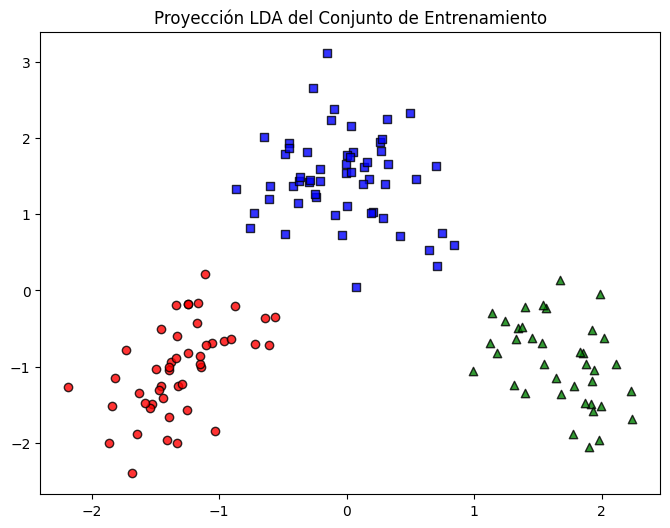

In [14]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

#Grafico los datos transformados (gráfico de dispersión)

plt.figure(figsize=(8,6))
for idx, cl in enumerate(np.unique(y_train)):
    plt.scatter(x=X_train_lda[y_train == cl, 0],
                y=X_train_lda[y_train == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')
plt.title('Proyección LDA del Conjunto de Entrenamiento')
plt.show()


## LDA usando Scikit-Learn

Usando la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html), utilice el análisis discriminante lineal de scikit learn sobre `X_train_std`para obtener el mismo resultado. Compare los graficos de dispersión.

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Entrenamiento
discriminante_lineal = LDA()

discriminante_lineal.fit(x_train_sd, y_train)

LinearDiscriminantAnalysis()

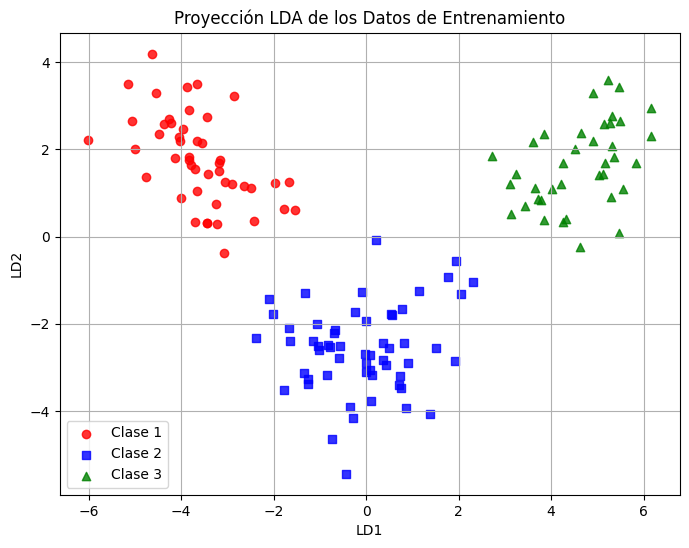

In [25]:
# Proyectar los datos de entrenamiento y prueba usando el modelo entrenado
X_train_lda = discriminante_lineal.transform(x_train_sd)
X_test_lda = discriminante_lineal.transform(x_test_sd)

# Graficar los datos proyectados
plt.figure(figsize=(8, 6))

# Graficar datos de entrenamiento
for i, color, marker in zip(np.unique(y_train), ['r', 'b', 'g'], ['o', 's', '^']):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], 
                alpha=0.8, color=color, marker=marker, label=f'Clase {i}')
    
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Proyección LDA de los Datos de Entrenamiento')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Evalue el modelo con los datos de prueba `X_test_std` y calcule el `accuracy`

In [21]:

y_pred = discriminante_lineal.predict(x_test_sd)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
round(accuracy,4)


0.9444